## Plot the monthly number of searches for flights arriving at Málaga, Madrid or Barcelona

For the arriving airport, you can use the Destination column in the searches file. 

Plot a curve for Málaga, another one for Madrid, and another one for Barcelona, in the same figure.


## 1) Get familiar with data

In [1]:
import pandas as pd

In [2]:
!pwd

/home/dsc/Python/DS_Master_A1_Chall/master4


In [3]:
cd ~/Data/challenge/

/home/dsc/Data/challenge


In [4]:
!ls -l

total 1020616
-rw-rw-r--. 1 dsc dsc 554970628 Jan  4  2016 bookings.csv.bz2
-rw-rw-r--  1 dsc dsc    535893 May 19 17:15 bookings.sample.csv.bz2
-rw-rw-r--  1 dsc dsc   4232732 May 19 17:39 bookings.sample.csv.csv
-rw-rw-r--. 1 dsc dsc 483188920 Jan  4  2016 searches.csv.bz2
-rw-rw-r--  1 dsc dsc    244720 May 19 17:20 searches.sample.csv.bz2
-rw-rw-r--  1 dsc dsc   1824927 May 19 17:39 searches.sample.csv.csv
-rw-rw-r--  1 dsc dsc     84696 May 19 20:55 top_airports.csv


In [5]:
s=pd.read_csv('./searches.sample.csv.bz2', sep='^', nrows=1000)

In [6]:
s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 45 columns):
Date                 1000 non-null object
Time                 1000 non-null object
TxnCode              1000 non-null object
OfficeID             1000 non-null object
Country              1000 non-null object
Origin               1000 non-null object
Destination          1000 non-null object
RoundTrip            1000 non-null int64
NbSegments           1000 non-null int64
Seg1Departure        1000 non-null object
Seg1Arrival          1000 non-null object
Seg1Date             996 non-null object
Seg1Carrier          374 non-null object
Seg1BookingCode      80 non-null object
Seg2Departure        712 non-null object
Seg2Arrival          712 non-null object
Seg2Date             708 non-null object
Seg2Carrier          259 non-null object
Seg2BookingCode      66 non-null object
Seg3Departure        36 non-null object
Seg3Arrival          36 non-null object
Seg3Date             36 non-

In [7]:
s.isnull().sum()

Date                   0
Time                   0
TxnCode                0
OfficeID               0
Country                0
Origin                 0
Destination            0
RoundTrip              0
NbSegments             0
Seg1Departure          0
Seg1Arrival            0
Seg1Date               4
Seg1Carrier          626
Seg1BookingCode      920
Seg2Departure        288
Seg2Arrival          288
Seg2Date             292
Seg2Carrier          741
Seg2BookingCode      934
Seg3Departure        964
Seg3Arrival          964
Seg3Date             964
Seg3Carrier          964
Seg3BookingCode      965
Seg4Departure        970
Seg4Arrival          970
Seg4Date             970
Seg4Carrier          970
Seg4BookingCode      971
Seg5Departure        995
Seg5Arrival          995
Seg5Date             995
Seg5Carrier          995
Seg5BookingCode      995
Seg6Departure        997
Seg6Arrival          997
Seg6Date             997
Seg6Carrier          997
Seg6BookingCode      997
From                  11


In [9]:
s.shape

(1000, 45)

In [10]:
s.describe()

RoundTrip   NbSegments  IsPublishedForNeg  IsFromInternet  \
count  1000.000000  1000.000000             1000.0          1000.0   
mean      0.699000     1.786000                0.0             0.0   
std       0.458922     0.643909                0.0             0.0   
min       0.000000     1.000000                0.0             0.0   
25%       0.000000     1.000000                0.0             0.0   
50%       1.000000     2.000000                0.0             0.0   
75%       1.000000     2.000000                0.0             0.0   
max       1.000000     6.000000                0.0             0.0   

       IsFromVista  
count       1000.0  
mean           0.0  
std            0.0  
min            0.0  
25%            0.0  
50%            0.0  
75%            0.0  
max            0.0

In [11]:
pd.set_option('display.max_columns',None)

In [13]:
s.sample(5)

Date      Time TxnCode                          OfficeID Country  \
796  2013-01-01  17:35:39     MPT  788e52ddaa551032c69ba37cc316233f      FR   
820  2013-01-01  09:07:20     MPT  b695299cc14ddcd1e31f1c922b3e258c      US   
272  2013-01-01  23:03:40     FFP  7fa90be582577257ca6271d9ecb55b7c      TH   
534  2013-01-01  15:12:15     MTP  e08742a93e1d3d9e679723625a3484fc      DE   
629  2013-01-01  11:10:36     FQP  38c65dc4e357b799036673b6e7a1cf70      LY   

    Origin Destination  RoundTrip  NbSegments Seg1Departure Seg1Arrival  \
796    NCE         BEY          1           2           NCE         BEY   
820    JFK         SJU          1           2           JFK         SJU   
272    PER         LHR          1           2           PER         LHR   
534    AKL         FRA          0           1           AKL         FRA   
629    TIP         DAC          0           1           TIP         DAC   

       Seg1Date Seg1Carrier Seg1BookingCode Seg2Departure Seg2Arrival  \
796  2013-02-15         NaN             NaN           BEY         NCE   
820  2013-01-03         NaN             NaN           SJU         JFK   
272  2013-04-30          EQ             NaN           LHR         PER   
534  2013-02-27         NaN             NaN           NaN         NaN   
629  2013-01-01          JJ                           NaN         NaN   

       Seg2Date Seg2Carrier Seg2BookingCode Seg3Departure Seg3Arrival  \
796  2013-02-26         NaN             NaN           NaN         NaN   
820  2013-01-07         NaN             NaN           NaN         NaN   
272  2013-05-12          EQ             NaN           NaN         NaN   
534         NaN         NaN             NaN           NaN         NaN   
629         NaN         NaN             NaN           NaN         NaN   

    Seg3Date Seg3Carrier Seg3BookingCode Seg4Departure Seg4Arrival Seg4Date  \
796      NaN         NaN             NaN           NaN         NaN      NaN   
820      NaN         NaN             NaN           NaN         NaN      NaN   
272      NaN         NaN             NaN           NaN         NaN      NaN   
534      NaN         NaN             NaN           NaN         NaN      NaN   
629      NaN         NaN             NaN           NaN         NaN      NaN   

    Seg4Carrier Seg4BookingCode Seg5Departure Seg5Arrival Seg5Date  \
796         NaN             NaN           NaN         NaN      NaN   
820         NaN             NaN           NaN         NaN      NaN   
272         NaN             NaN           NaN         NaN      NaN   
534         NaN             NaN           NaN         NaN      NaN   
629         NaN             NaN           NaN         NaN      NaN   

    Seg5Carrier Seg5BookingCode Seg6Departure Seg6Arrival Seg6Date  \
796         NaN             NaN           NaN         NaN      NaN   
820         NaN             NaN           NaN         NaN      NaN   
272         NaN             NaN           NaN         NaN      NaN   
534         NaN             NaN           NaN         NaN      NaN   
629         NaN             NaN           NaN         NaN      NaN   

    Seg6Carrier Seg6BookingCode    From  IsPublishedForNeg  IsFromInternet  \
796         NaN             NaN    1ASI                  0               0   
820         NaN             NaN    1ASI                  0               0   
272         NaN             NaN  1ASIWS                  0               0   
534         NaN             NaN  1ASIWS                  0               0   
629         NaN             NaN    1ASI                  0               0   

     IsFromVista                        TerminalID InternetOffice  
796            0  d41d8cd98f00b204e9800998ecf8427e            PAR  
820            0  d41d8cd98f00b204e9800998ecf8427e            SJC  
272            0  d41d8cd98f00b204e9800998ecf8427e            BKK  
534            0  d41d8cd98f00b204e9800998ecf8427e            FRA  
629            0  f9b8a5c1ef65920db94d0bd35b2c9a03            TIP

## 2) Select the columns of interest

In [14]:
s=pd.read_csv('./searches.sample.csv.bz2', sep='^', usecols=['Date', 'Destination'], nrows=1000)

In [15]:
s.head()

Date Destination
0  2013-01-01         AUH
1  2013-01-01         MIL
2  2013-01-01         SFO
3  2013-01-01         ARN
4  2013-01-01         MAD

## 3) What to do with NaN

In [16]:
s=s.dropna()

In [17]:
s=pd.read_csv('./searches.sample.csv.bz2', sep='^', usecols=['Date', 'Destination'], nrows=1000)
s=s.dropna()
s.head()

Date Destination
0  2013-01-01         AUH
1  2013-01-01         MIL
2  2013-01-01         SFO
3  2013-01-01         ARN
4  2013-01-01         MAD

In [18]:
s.dtypes

Date           object
Destination    object
dtype: object

## 4) Make action plan


iata codes:[MAD, BCN, AGP]

filter out the the searches for MAD, BCN, AGP
take only the rows having MAD, BCN or AGP as destination

In [30]:
s=pd.read_csv('./searches.sample.csv.bz2', sep='^', usecols=['Date', 'Destination'], nrows=1000)
s=s.dropna()
sFilter=s[(s['Destination']=='MAD') | (s['Destination']=='BCN') | (s['Destination']=='AGP')]

In [24]:
sFilter=s[   s['Destination'].isin(['MAD','BCN','AGP'])        ]

In [27]:
s=pd.read_csv('./searches.sample.csv.bz2', sep='^', usecols=['Date', 'Destination'], \
              parse_dates=['Date'], nrows=1000)


In [29]:
s.dtypes

Date           datetime64[ns]
Destination            object
dtype: object

In [31]:
s=pd.read_csv('./searches.sample.csv.bz2', sep='^', usecols=['Date', 'Destination'], nrows=1000)
s=s.dropna()
sFilter=s[   s['Destination'].isin(['MAD','BCN','AGP'])        ]
s.head()

Date Destination
0  2013-01-01         AUH
1  2013-01-01         MIL
2  2013-01-01         SFO
3  2013-01-01         ARN
4  2013-01-01         MAD

In [32]:
s['Year-Month']=s['Date'].str[0:7]

In [34]:
s.drop('Date', axis=1, inplace=True)

In [35]:
s.head()

Destination Year-Month
0         AUH    2013-01
1         MIL    2013-01
2         SFO    2013-01
3         ARN    2013-01
4         MAD    2013-01

In [51]:
s=pd.read_csv('./searches.sample.csv.bz2', sep='^', usecols=['Date', 'Destination'], nrows=1000)
s=s.dropna()
sFilter=s[   s['Destination'].isin(['MAD','BCN','AGP'])   ].copy()
sFilter['Year-Month']=sFilter['Date'].str[0:7]
sFilter.drop('Date', axis=1, inplace=True)

This is why we get worning without using a .copy

In [42]:
df=pd.DataFrame({'x':[1,2]})

In [43]:
df

x
0  1
1  2

In [44]:
df_sub=df[0:1]
df_sub

x
0  1

In [45]:
df_sub.x=-2

/home/dsc/anaconda2/lib/python2.7/site-packages/pandas/core/generic.py:2773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [46]:
df

x
0 -2
1  2

In [48]:
df_sub2=df[0:1].copy()

In [49]:
df_sub2.x=-10

In [50]:
df

x
0 -2
1  2

What do we have?

In [103]:
s=pd.read_csv('./searches.sample2.csv.bz2', sep='^', usecols=['Date', 'Destination'])
s=s.dropna()
sFilter=s[   s['Destination'].isin(['MAD','BCN','AGP'])   ].copy()
sFilter['Year-Month']=sFilter['Date'].str[0:7]
sFilter.drop('Date', axis=1, inplace=True)
#sFilter_gr=sFilter.groupby(['Year-Month', 'Destination']).size() #-->Series
sFilter_gr=sFilter.reset_index().groupby(['Year-Month', 'Destination']).count().reset_index()

In [105]:
sFilter_gr.head()

Year-Month Destination  index
0    2013-01         AGP    169
1    2013-01         BCN    517
2    2013-01         MAD    425
3    2013-02         AGP    147
4    2013-02         BCN    497

In [92]:
type(sFilter_gr)

pandas.core.frame.DataFrame

In [80]:
!pwd

/home/dsc/Data/challenge


Make bigger sample so that it has more points to plot

In [100]:
!bzcat ./searches.csv.bz2 | head -200000 > ./searches.sample2.csv



bzcat: I/O or other error, bailing out.  Possible reason follows.
bzcat: Broken pipe
	Input file = ./searches.csv.bz2, output file = (stdout)


In [101]:
!bzip2 -f ./searches.sample2.csv

In [102]:
!ls -l

total 1025316
-rw-rw-r--. 1 dsc dsc 554970628 Jan  4  2016 bookings.csv.bz2
-rw-rw-r--  1 dsc dsc    535893 May 19 17:15 bookings.sample.csv.bz2
-rw-rw-r--  1 dsc dsc   4232732 May 19 17:39 bookings.sample.csv.csv
-rw-rw-r--. 1 dsc dsc 483188920 Jan  4  2016 searches.csv.bz2
-rw-rw-r--  1 dsc dsc   4811806 May 20 10:50 searches.sample2.csv.bz2
-rw-rw-r--  1 dsc dsc    244720 May 19 17:20 searches.sample.csv.bz2
-rw-rw-r--  1 dsc dsc   1824927 May 19 17:39 searches.sample.csv.csv
-rw-rw-r--  1 dsc dsc     84696 May 19 20:55 top_airports.csv


In [106]:
sFilter_gr.head()

Year-Month Destination  index
0    2013-01         AGP    169
1    2013-01         BCN    517
2    2013-01         MAD    425
3    2013-02         AGP    147
4    2013-02         BCN    497

In [108]:
sFilter_gr.rename(columns={'index':'Num Searches'}, inplace=True)

In [110]:
sFilter_gr.head()

Year-Month Destination  Num Searches
0    2013-01         AGP           169
1    2013-01         BCN           517
2    2013-01         MAD           425
3    2013-02         AGP           147
4    2013-02         BCN           497

##  Plotting

In [111]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [112]:
prepared_df=sFilter_gr.pivot('Year-Month', 'Destination', 'Num Searches')

In [113]:
prepared_df.head()

Destination  AGP  BCN  MAD
Year-Month                
2013-01      169  517  425
2013-02      147  497  400
2013-03      187  536  433
2013-04      145  548  443
2013-05      190  504  462

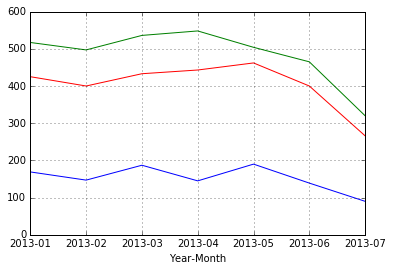

In [115]:
prepared_df.plot(grid=True)

Another option for plotting

In [117]:
import seaborn as sns

In [119]:
import seaborn as sns
ax=sns.pointplot(x='Year-Month', y='Num Searches', hue='Destination', data=sFilter_gr)
ax.set(xlabel='Month', ylabel='Number of Searches')

## 5) Adjust the code to work with Big data

In [116]:
s=pd.read_csv('./searches.sample2.csv.bz2', sep='^', usecols=['Date', 'Destination'])
s=s.dropna()
sFilter=s[   s['Destination'].isin(['MAD','BCN','AGP'])   ].copy()
sFilter['Year-Month']=sFilter['Date'].str[0:7]
sFilter.drop('Date', axis=1, inplace=True)
#sFilter_gr=sFilter.groupby(['Year-Month', 'Destination']).size() #-->Series
sFilter_gr=sFilter.reset_index().groupby(['Year-Month', 'Destination']).count().reset_index()
sFilter_gr.rename(columns={'index':'Num Searches'}, inplace=True)
prepared_df=sFilter_gr.pivot('Year-Month', 'Destination', 'Num Searches')
prepared_df.plot(grid=True)

In [122]:
sc=pd.read_csv('./searches.sample2.csv.bz2', sep='^', usecols=['Date', 'Destination'],\
               chunksize=60000)

all_results=pd.DataFrame()

for i, chunk in enumerate(sc):
    print "Chunk %d with size %d"%(i+1, len(chunk))
    s=chunk.dropna()
    sFilter=s[   s['Destination'].isin(['MAD','BCN','AGP'])   ].copy()
    sFilter['Year-Month']=sFilter['Date'].str[0:7]
    sFilter.drop('Date', axis=1, inplace=True)
    sFilter_gr=sFilter.reset_index().groupby(['Year-Month', 'Destination']).count().reset_index()
    all_results=all_results.append(sFilter_gr)

all_results.head()
#sFilter_gr.rename(columns={'index':'Num Searches'}, inplace=True)
#prepared_df=sFilter_gr.pivot('Year-Month', 'Destination', 'Num Searches')
#prepared_df.plot(grid=True)

Chunk 1 with size 60000
Chunk 2 with size 60000
Chunk 3 with size 60000
Chunk 4 with size 19999


Year-Month Destination  index
0    2013-01         AGP    169
1    2013-01         BCN    517
2    2013-01         MAD    425
3    2013-02         AGP    147
4    2013-02         BCN    497

In [127]:
all_results_gr=all_results.groupby(['Year-Month', 'Destination']).sum().reset_index()
all_results_gr.rename(columns={'index':'Num Searches'}, inplace=True)

In [128]:
all_results_gr.head()

Year-Month Destination  Num Searches
0    2013-01         AGP           169
1    2013-01         BCN           517
2    2013-01         MAD           425
3    2013-02         AGP           147
4    2013-02         BCN           497

In [130]:
import seaborn as sns
ax=sns.pointplot(x='Year-Month', y='Num Searches', hue='Destination', data=all_results_gr)
ax.set(xlabel='Month', ylabel='Number of Searches')

In [132]:
%%time
sc=pd.read_csv('./searches.csv.bz2', sep='^', usecols=['Date', 'Destination'],\
               chunksize=1000000)

all_results=pd.DataFrame()

for i, chunk in enumerate(sc):
    print "Chunk %d with size %d"%(i+1, len(chunk))
    s=chunk.dropna()
    sFilter=s[   s['Destination'].isin(['MAD','BCN','AGP'])   ].copy()
    sFilter['Year-Month']=sFilter['Date'].str[0:7]
    sFilter.drop('Date', axis=1, inplace=True)
    sFilter_gr=sFilter.reset_index().groupby(['Year-Month', 'Destination']).count().reset_index()
    all_results=all_results.append(sFilter_gr)

all_results_gr=all_results.groupby(['Year-Month', 'Destination']).sum().reset_index()
all_results_gr.rename(columns={'index':'Num Searches'}, inplace=True)
ax=sns.pointplot(x='Year-Month', y='Num Searches', hue='Destination', data=all_results_gr)
ax.set(xlabel='Month', ylabel='Number of Searches')

Chunk 1 with size 1000000
Chunk 2 with size 1000000
Chunk 3 with size 1000000
Chunk 4 with size 1000000
Chunk 5 with size 1000000
Chunk 6 with size 1000000
Chunk 7 with size 1000000
Chunk 8 with size 1000000
Chunk 9 with size 1000000
Chunk 10 with size 1000000
Chunk 11 with size 1000000
Chunk 12 with size 1000000
Chunk 13 with size 1000000
Chunk 14 with size 1000000
Chunk 15 with size 1000000
Chunk 16 with size 1000000
Chunk 17 with size 1000000
Chunk 18 with size 1000000
Chunk 19 with size 1000000
Chunk 20 with size 1000000
Chunk 21 with size 390198
CPU times: user 3min 52s, sys: 1.03 s, total: 3min 53s
Wall time: 3min 58s
